In [1]:
#importer les packages nécessaires
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
#importer les données
df = pd.read_csv('dataset-90380.csv')
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
#centrer et reduire nos données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Appliquer Kmeans

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 51.49992859726626,
 43.927464044975736,
 41.097580466587324,
 35.45371227726498,
 31.76150894754953,
 28.53690045617476]

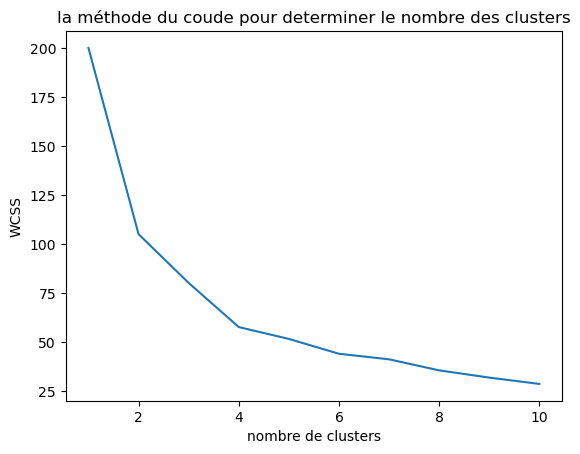

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('la méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans_etats = KMeans(n_clusters=4, init = 'k-means++')

In [10]:
kmeans_etats.fit(x_scaled)

KMeans(n_clusters=4)

In [11]:
clusters = kmeans_etats.predict(x_scaled)

In [12]:
df['cluster']=clusters
df

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,3


In [13]:
df_clusters = df.groupby(['cluster']).median().round(0)
    
df_clusters

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,3.0,81.0,53.0,11.0
1,6.0,147.0,72.0,19.0
2,11.0,255.0,80.0,32.0
3,14.0,242.0,54.0,22.0


In [14]:
for i in range(4):
    print(f'Cluster {i}')
    print(df[df.cluster == i].index.tolist())
    print()

Cluster 0
['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']

Cluster 1
['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']

Cluster 2
['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'Texas']

Cluster 3
['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']



## Utiliser l'ACP pour visualiser les données

In [15]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Nombre de composantes calculées :  4


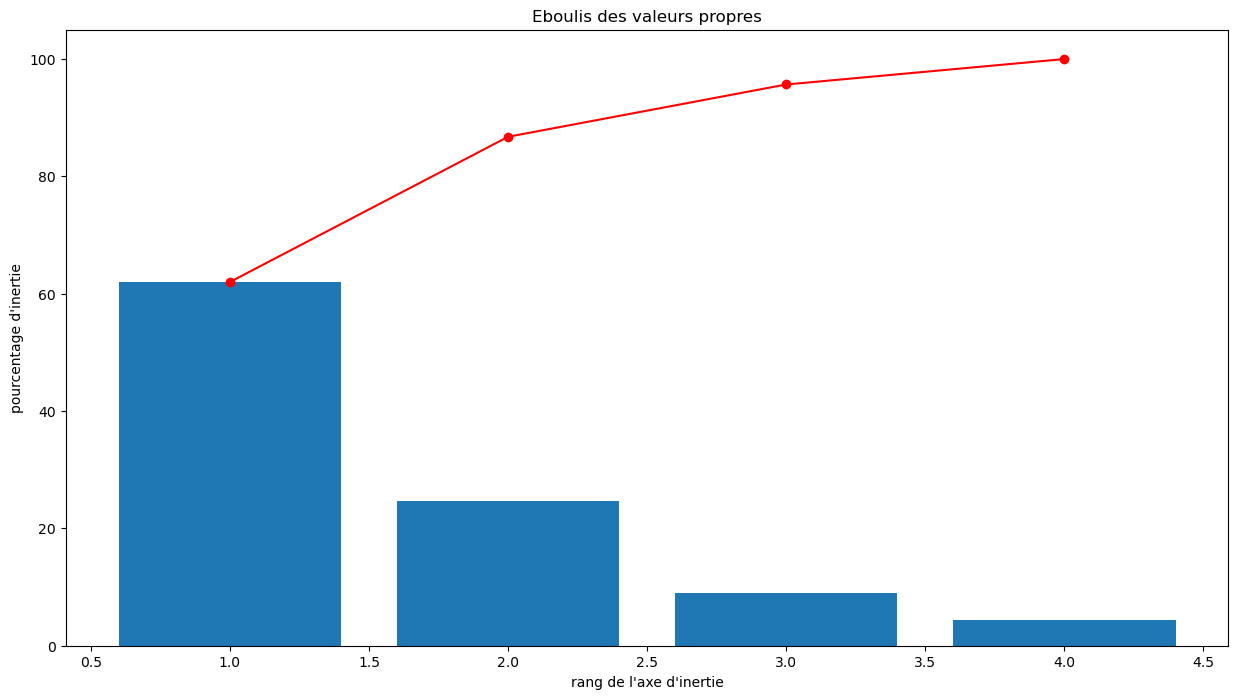

In [16]:
# choix du nombre de composantes à calculer vu qu'on a trois parametres
n_comp = 4

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(x_scaled)
print('Nombre de composantes calculées : ', pca.n_components_)

# Eboulis des valeurs propres
plt.figure( figsize = ( 15, 8)) 
display_scree_plot(pca)

In [17]:
#appliquer l'acp pour avoir 2 composants du moment que 2 composants nous permettent d'avoir 87 de l'information
pca = PCA(n_components=2).fit(x_scaled)
Xk_projected = pca.transform(x_scaled)

<AxesSubplot:>

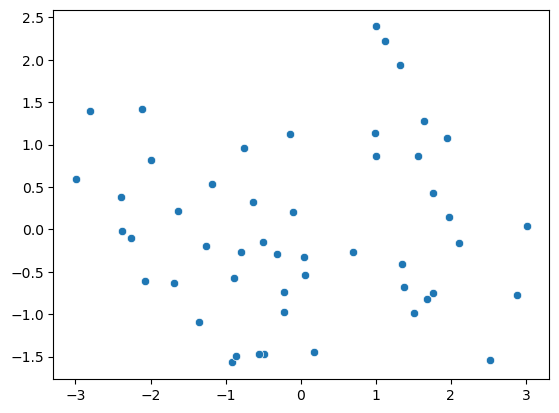

In [18]:
# dessiner les projections de x_scaled sur les deux composantes qu'on a trouvé en utlisant ACP
sns.scatterplot(data=Xk_projected, x=Xk_projected[:, 0], y=Xk_projected[:, 1], alpha=1)

In [19]:
#cette fonction dessine le cercle de correlation (vous pouvez l'avoir facilement sur google)
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

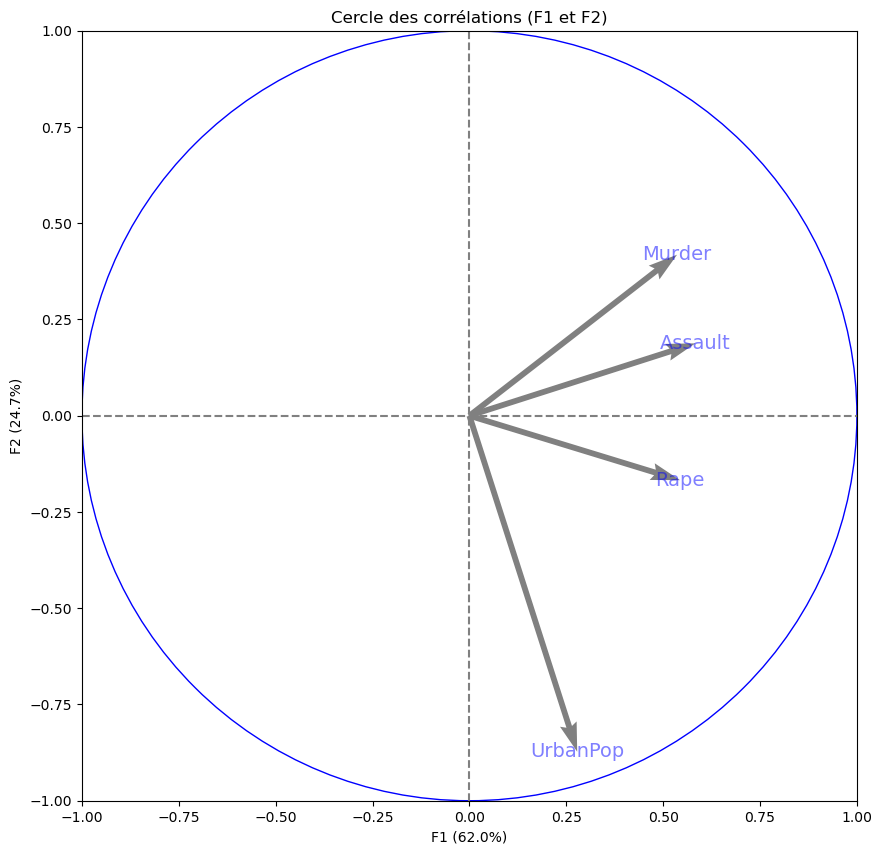

In [20]:
#utiliser la fonction display_circles() pour dessiner le cercle de correlation des deux composantes
index = df.index 
features = df.columns
choix_n_comp=2
pcs = pca.components_
display_circles(pcs, choix_n_comp, pca, [(0,1)], labels = np.array(features))

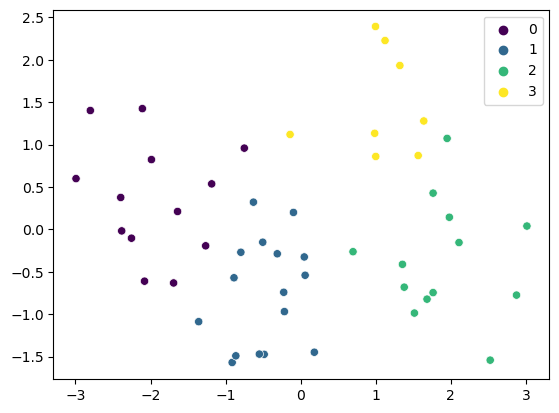

In [21]:
sns.scatterplot(data=Xk_projected, x=Xk_projected[:, 0], y=Xk_projected[:, 1], palette = 'viridis', alpha=1, hue=clusters)
plt.legend()
plt.show()